Not needed, use in case there is problem with JAVA_HOME

In [1]:
#import sys, os
#!mamba install --yes --prefix {sys.prefix} pyimagej openjdk=8
#os.environ['JAVA_HOME'] = os.sep.join(sys.executable.split(os.sep)[:-2] + ['jre'])

Autotime

In [1]:
try:
    %load_ext autotime
except:
    !pip install ipython-autotime
    %load_ext autotime

time: 15 ms (started: 2022-11-26 17:29:55 +01:00)


In [2]:
import imagej
import scyjava
scyjava.config.add_option('-Xmx6g')

time: 3.56 s (started: 2022-11-26 17:29:55 +01:00)


In [4]:
ij = imagej.init()

time: 3min 40s (started: 2022-11-26 17:33:00 +01:00)


In [5]:
ij.getVersion()

'2.9.0/1.53t'

time: 157 ms (started: 2022-11-26 17:36:41 +01:00)


In [6]:
# Load an image.
image_url = 'https://imagej.net/images/blobs.gif'
jimage = ij.io().open(image_url)

[java.lang.Enum.toString] [INFO] Verifying GIF format
[java.lang.Enum.toString] [INFO] Reading dimensions
[java.lang.Enum.toString] [INFO] Reading data blocks


time: 2.11 s (started: 2022-11-26 17:36:41 +01:00)


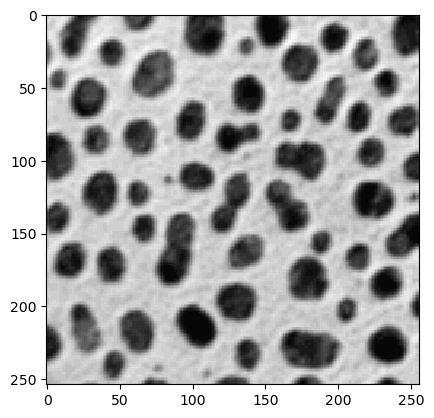

time: 1.72 s (started: 2022-11-26 17:36:43 +01:00)


In [7]:
# Display the image (backed by matplotlib).
ij.py.show(jimage, cmap='gray')

In [8]:
ij.py.run_macro("""run("Blobs (25K)");""")
blobs = ij.WindowManager.getCurrentImage()
print(blobs)

Operating in headless mode - the original ImageJ will have limited functionality.
Operating in headless mode - the WindowManager class will not be fully functional.


img["blobs.gif" (-3), 8-bit, 256x254x1x1x1]
time: 1.08 s (started: 2022-11-26 17:36:45 +01:00)


In [9]:
ij.py.run_macro("""run("Gaussian Blur...", "sigma=3");""")
blobs = ij.WindowManager.getCurrentImage()

time: 78 ms (started: 2022-11-26 17:36:46 +01:00)


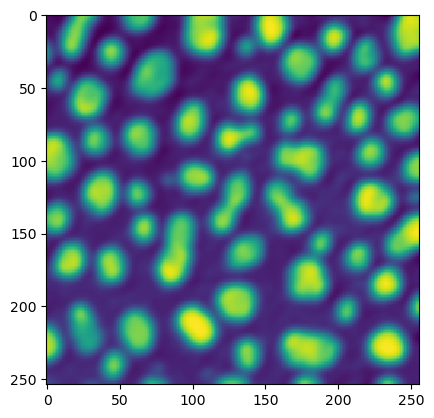

time: 328 ms (started: 2022-11-26 17:36:46 +01:00)


In [10]:
ij.py.show(blobs)

In [11]:
macro = """
setAutoThreshold("Otsu");
//setThreshold(123, 255);
setOption("BlackBackground", false);
run("Convert to Mask");
"""
# run("Analyze Particles...", "exclude add");
# roiManager("Measure");

time: 0 ns (started: 2022-11-26 17:36:46 +01:00)


In [12]:
print(blobs)

img["blobs.gif" (-3), 8-bit, 256x254x1x1x1]
time: 0 ns (started: 2022-11-26 17:36:46 +01:00)


In [13]:
args = {"image":blobs}
m_output = ij.py.run_script("ijm",macro)

time: 31 ms (started: 2022-11-26 17:36:46 +01:00)


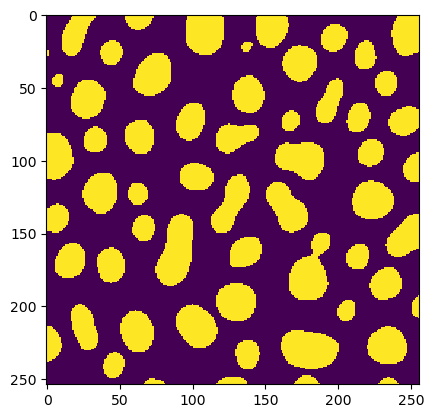

time: 156 ms (started: 2022-11-26 17:36:46 +01:00)


In [14]:
ij.py.show(blobs)

Simple macro test

In [15]:
macro = """
#@ String name
#@ int age
#@ String city
#@output Object greeting
greeting = "Hello " + name + ". You are " + age + " years old, and live in " + city + "."
"""
args = {
    'name': 'Chuckles',
    'age': 13,
    'city': 'Nowhere'
}
result = ij.py.run_macro(macro, args)
print(result.getOutput('greeting'))

Hello Chuckles. You are 13 years old, and live in Nowhere.
time: 110 ms (started: 2022-11-26 17:36:46 +01:00)


[java.lang.Enum.toString] [INFO] script:macro.ijm = [[greeting], [Hello Chuckles. You are 13 years old, and live in Nowhere.]]


Groovy macro test

In [16]:
# Load an image.
image_url = 'https://imagej.net/images/blobs.gif'
image = ij.io().open(image_url)

compute_stats_script = """
#@ OpService ops
#@ net.imglib2.RandomAccessibleInterval image
#@output stats

statNames = new org.scijava.table.GenericColumn("Statistic")
statValues = new org.scijava.table.DoubleColumn("Value")
addRow = (n, v) -> { statNames.add(n); statValues.add(v.getRealDouble()) }

addRow("geometricMean", ops.stats().geometricMean(image))
addRow("harmonicMean", ops.stats().harmonicMean(image))
addRow("kurtosis", ops.stats().kurtosis(image))
addRow("max", ops.stats().max(image))
addRow("mean", ops.stats().mean(image))
addRow("median", ops.stats().median(image))
addRow("min", ops.stats().min(image))
addRow("moment1AboutMean", ops.stats().moment1AboutMean(image))
addRow("moment2AboutMean", ops.stats().moment2AboutMean(image))
addRow("moment3AboutMean", ops.stats().moment3AboutMean(image))
addRow("moment4AboutMean", ops.stats().moment4AboutMean(image))
addRow("size", ops.stats().size(image))
addRow("skewness", ops.stats().skewness(image))
addRow("stdDev", ops.stats().stdDev(image))
addRow("sum", ops.stats().sum(image))
addRow("sumOfInverses", ops.stats().sumOfInverses(image))
addRow("sumOfLogs", ops.stats().sumOfLogs(image))
addRow("sumOfSquares", ops.stats().sumOfSquares(image))
addRow("variance", ops.stats().variance(image))

stats = new org.scijava.table.DefaultGenericTable()
stats.add(statNames)
stats.add(statValues)
"""

args = {"image":image}
result = ij.py.run_script("Groovy", compute_stats_script, args)

# convert SciJava Table to pandas DataFrame
df = ij.py.from_java(result.getOutput("stats"))
print(df)

[java.lang.Enum.toString] [INFO] Verifying GIF format
[java.lang.Enum.toString] [INFO] Reading dimensions
[java.lang.Enum.toString] [INFO] Reading data blocks


           Statistic            Value
0      geometricMean       122.683058
1       harmonicMean        76.066879
2           kurtosis         1.921583
3                max            247.0
4               mean       151.731422
5             median            191.0
6                min              7.0
7   moment1AboutMean              0.0
8   moment2AboutMean      5049.032935
9   moment3AboutMean   -255825.465901
10  moment4AboutMean  48986905.958983
11              size         195072.0
12          skewness        -0.713063
13            stdDev         71.05673
14               sum       29598552.0
15     sumOfInverses      2564.480148
16         sumOfLogs     938219.12315
17      sumOfSquares     5475955344.0
18          variance      5049.058818
time: 3.48 s (started: 2022-11-26 17:36:47 +01:00)


In [17]:
!pip install watermark

In [18]:
from watermark import watermark
watermark(iversions=True, globals_=globals())
print(watermark())

Last updated: 2022-11-26T17:36:53.887907+01:00

Python implementation: CPython
Python version       : 3.8.13
IPython version      : 8.4.0

Compiler    : MSC v.1929 64 bit (AMD64)
OS          : Windows
Release     : 10
Machine     : AMD64
Processor   : Intel64 Family 6 Model 158 Stepping 9, GenuineIntel
CPU cores   : 4
Architecture: 64bit

time: 31 ms (started: 2022-11-26 17:36:53 +01:00)


In [19]:
print(watermark(packages="watermark,numpy,pandas,imagej"))

watermark: 2.3.1
numpy    : 1.23.5
pandas   : 1.5.1
imagej   : 1.3.1

time: 31 ms (started: 2022-11-26 17:36:53 +01:00)
